# 6.5 Machine Learning Part 2

### Table of Contents
1. Import Libraries and Data
2. Data Cleaning and Column Selection
3. Elbow Technique
4. K-Means Clustering
5. Analysis

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/jakeupchurch/Documents/UFC Project'

In [4]:
ufc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Data_Cleaned3.csv'))

In [5]:
ufc.shape

(2523, 151)

In [6]:
ufc.head()

R_fighter        B_fighter        Referee     date location Winner  \
0     Adrian Yanez    Gustavo Lopez  Chris Tognoni  3/20/21  Alabama    Red   
1     Trevin Giles    Roman Dolidze      Herb Dean  3/20/21  Alabama    Red   
2      Tai Tuivasa  Harry Hunsucker      Herb Dean  3/20/21  Alabama    Red   
3    Marion Reneau    Macy Chiasson     Mark Smith  3/20/21  Alabama   Blue   
4  Leonardo Santos     Grant Dawson  Chris Tognoni  3/20/21  Alabama   Blue   

   title_bout       weight_class  B_avg_KD  B_avg_opp_KD  ...  R_Weight_lbs  \
0       False       Bantamweight     0.000           0.0  ...           135   
1       False       Middleweight     0.500           0.0  ...           185   
2       False        Heavyweight       NaN           NaN  ...           264   
3       False  WomenBantamweight     0.125           0.0  ...           135   
4       False        Lightweight     0.000           0.0  ...           155   

   B_age  R_age  KO/TKO  AVG_KD  TKO-YES  SIG_STR_PCT    TD_PCT  HEAD_PCT  \
0   31.0   27.0       1  0.0000        1     0.457500  0.345000  0.375610   
1   32.0   28.0       4  0.2500        1     0.482500  0.400000  0.335366   
2   32.0   28.0       3  0.0000        1     0.000000  0.000000  0.000000   
3   29.0   43.0       4  0.0625        1     0.557187  0.175625  0.454020   
4   27.0   41.0       2  0.0000        1     0.494375  0.342500  0.366505   

    LEG_PCT  
0  0.875000  
1  0.962963  
2  0.000000  
3  0.625000  
4  0.860140  

[5 rows x 151 columns]

### 2. Dating Cleaning and Column Selection

In [8]:
#I created a subset where only fights that ended in KO/TKO's are present.  I want to see if these fights have
#anything in common.  Below, I am creating another subset using only the columns with statistics I want to compare.

ufc2 = ufc[["AVG_KD", "SIG_STR_PCT", "TD_PCT", "HEAD_PCT", "LEG_PCT"]]

In [9]:
ufc2.head()

AVG_KD  SIG_STR_PCT    TD_PCT  HEAD_PCT   LEG_PCT
0  0.0000     0.457500  0.345000  0.375610  0.875000
1  0.2500     0.482500  0.400000  0.335366  0.962963
2  0.0000     0.000000  0.000000  0.000000  0.000000
3  0.0625     0.557187  0.175625  0.454020  0.625000
4  0.0000     0.494375  0.342500  0.366505  0.860140

In [10]:
#Check for Missing Values
ufc2.isnull().sum()

AVG_KD         0
SIG_STR_PCT    0
TD_PCT         0
HEAD_PCT       0
LEG_PCT        0
dtype: int64

In [11]:
#Checking for Duplicates
dups = ufc2.duplicated()

In [12]:
dups.shape

(2523,)

### 3. Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(ufc2).score(ufc2) for i in range(len(kmeans))]

score

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-575.5618188923271,
 -284.3422821422055,
 -202.21899169858716,
 -172.49089363243087,
 -146.41770334197832,
 -131.67819597534685,
 -118.25365020336673,
 -108.78499371771403,
 -101.6930232661736]

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Question 4:  I am going to use 3 as the number of clusters because that is around the area where the graph starts to flatten out.  After 3, it doesn't appear more clusters would better explain the variances in my data.

### 4. K-Means Clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data.

kmeans.fit(ufc2)

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
ufc2['clusters'] = kmeans.fit_predict(ufc2)

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_29300/1120095697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc2['clusters'] = kmeans.fit_predict(ufc2)


In [19]:
ufc2.head()

AVG_KD  SIG_STR_PCT    TD_PCT  HEAD_PCT   LEG_PCT  clusters
0  0.0000     0.457500  0.345000  0.375610  0.875000         1
1  0.2500     0.482500  0.400000  0.335366  0.962963         1
2  0.0000     0.000000  0.000000  0.000000  0.000000         2
3  0.0625     0.557187  0.175625  0.454020  0.625000         1
4  0.0000     0.494375  0.342500  0.366505  0.860140         1

In [20]:
ufc2['clusters'].value_counts()

clusters
1    1436
0     730
2     357
Name: count, dtype: int64

In [21]:
# Plot the clusters for the "AVG_KD" and "HEAD_PCT" variables. AVG_KD=Average Knockdowns in fight and HEAD_PCT=Percentage of Head shots landed

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ufc2['AVG_KD'], y=ufc2['HEAD_PCT'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('AVG_KD') # Label x-axis.
plt.ylabel('HEAD_PCT') # Label y-axis.
plt.show()

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [22]:
# Plot the clusters for the "TD_PCT" and "LEG_PCT" variables.  TD_PCT=Percentage of takedowns and LEG_PCT=Percentage of leg kicks landed

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ufc2['TD_PCT'], y=ufc2['LEG_PCT'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('TD_PCT') # Label x-axis.
plt.ylabel('LEG_PCT') # Label y-axis.
plt.show()

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


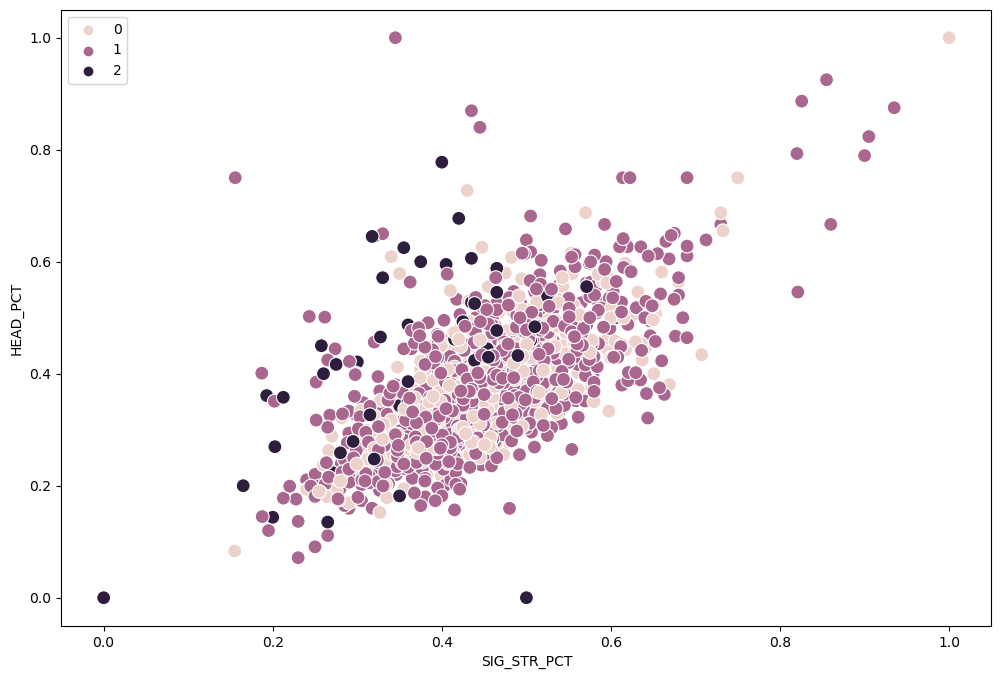

In [23]:
# Plot the clusters for the "SIG_STR_PCT" and "HEAD_PCT" variables. SIG_STR_PCT= Percentage of significant strikes landed.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ufc2['SIG_STR_PCT'], y=ufc2['HEAD_PCT'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('SIG_STR_PCT') # Label x-axis.
plt.ylabel('HEAD_PCT') # Label y-axis.
plt.show()

### Question 8 (Explain how clusters makes sense or don't):
In the first scatterplot, I explored average knockdowns vs head shot landed percentage.  This plot makes sense because the number of knockdowns in a fight should be related to head shots landed because you are more likely to be knocked down by a head shot.  It does appear that if you removed some outliers, there could be a slight linear relationship. The two main clusters separate at around 0.3 average knockdowns which is interesting.

In the second scatterplot, I explored percentage of takedowns vs percentage leg kicks landed.  This scatterplot did make sense in that someone who is primarily kicking doesn't perform a lot of takedowns because it is two different styles of fighting.  Otherwise, the scatterplot did not make much sense but it is interesting to see leg kicks landed percentage is fairly high during most of the KO/TKO fights.

In the third scatterplot, I explored significant strike percentage vs head shot landed percentage.  I did this scatterplot because this should have a linear relationship and it does so the scatterplot makes sense.  The more significant strikes you land the more times you are hitting the opponent in the head.  The clusters all mixed together makes sense as well due to the fact that this relationship is linear.

In [24]:
#Descriptive Statistics
ufc2.loc[ufc2['clusters'] == 2, 'cluster'] = 'dark purple'
ufc2.loc[ufc2['clusters'] == 1, 'cluster'] = 'purple'
ufc2.loc[ufc2['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_29300/356734584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc2.loc[ufc2['clusters'] == 2, 'cluster'] = 'dark purple'
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_29300/356734584.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ufc2.loc[ufc2['clusters'] == 2, 'cluster'] = 'dark purple'


In [25]:
ufc2.groupby('cluster').agg({'AVG_KD':['mean', 'median'], 
                         'HEAD_PCT':['mean', 'median'], 
                         'TD_PCT':['mean', 'median'],
                          'LEG_PCT':['mean', 'median'],
                            'SIG_STR_PCT':['mean', 'median']})

AVG_KD            HEAD_PCT              TD_PCT         \
                 mean    median      mean    median      mean median   
cluster                                                                
dark purple  0.032300  0.000000  0.073532  0.000000  0.047926  0.000   
pink         0.496914  0.500000  0.372899  0.366120  0.189165  0.165   
purple       0.105617  0.064026  0.366826  0.352494  0.319127  0.310   

              LEG_PCT           SIG_STR_PCT            
                 mean    median        mean    median  
cluster                                                
dark purple  0.005379  0.000000    0.067654  0.000000  
pink         0.799816  0.812500    0.446131  0.440039  
purple       0.796557  0.808365    0.441386  0.434063

### Question 9 (Desc. Statistics Findings):
The pink cluster performed the best over all the others, except in the takedown percentage which the purple was a little higher.
It would appear that average knockdown is fairly important as the pink cluster performed much better than the other two clusters in that category.
It also would appear takedown percentage could be important due to the purple cluster performing much better than the other two clusters in this category.  The pink and purple are fairly close in statistics other than in the two areas I've mentioned as important (average knockdown and takedown percentage).
The leg percentage is very high and makes sense it is easier to land a leg kick than a head kick or any of the other takedowns/strikes.

### Question 10 (Results for Future Analysis):
I believe this exercise was the most important for my analysis and future analysis so far.  By creating a subset of only fights that ended in KO/TKO I was able to compare what the fights had in common.  I believe my future analysis needs to focus on leg percentage and average knockdowns as these two seem to be very important in KO/TKO victories.  I do believe also by using the clusters above I can find more similarities by finding out why the pink and purple clusters were so similar except in the two categories.  I also think using clustering on other types of victories will help me discover trends in those as well.